### Introduction
 This dataset includes information of over 110k medical patients gotten from a welfare program called (Bolsa Familia) in Brazil in order to help the poor masses in the country in two factors of life which are both financial and educational alleviation .


The dataset cummulation showed whether a particular patient showed up or didn't along with other information of the patient such as ; "Neighbourhood","Age",'Scholarship',"Diabetes" etc..

##### Goal : Predicting whether a patients is likely to show up or not.
   To do this we are going investigate the dataset and see which of the features given,affect whether a person is likely to show up or not (Prediction).
        

#### Loading necesssary libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##### Importing our dataset

In [2]:
df=pd.read_csv("no show appointment.csv")

In [3]:
df.shape

(110527, 14)

This dataset comprises of 110527 rows and 14 columns

In [4]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.tail()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


The dataset is comprised with 3 data types which are: object(Letters) , integer(Numbers) and float(Decimal). No-null values present either.

### Checking for missing value 

In [7]:
df.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

No missing data found , hence the dataset bieng ready to be explored and undergo further analysis.

###### Looking at the column  head and their values we can easily deduce which column is needed for us to solve our problem .

In [8]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

##### Checking the statistics for columns with numerical value

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PatientId,110527.0,1.474963e+14,2.560949e+14,3.921784e+04,4.172614e+12,3.173184e+13,9.439172e+13,9.999816e+14
AppointmentID,110527.0,5.675305e+06,7.129575e+04,5.030230e+06,5.640286e+06,5.680573e+06,5.725524e+06,5.790484e+06
Age,110527.0,3.708887e+01,2.311020e+01,-1.000000e+00,1.800000e+01,3.700000e+01,5.500000e+01,1.150000e+02
Scholarship,110527.0,9.826558e-02,2.976748e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Hipertension,110527.0,1.972459e-01,3.979213e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Diabetes,110527.0,7.186479e-02,2.582651e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Alcoholism,110527.0,3.039981e-02,1.716856e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Handcap,110527.0,2.224796e-02,1.615427e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
SMS_received,110527.0,3.210256e-01,4.668727e-01,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00


For the numerical columns:


SMS_recieved: More people recieved SMS 

Age: the oldest patient being a 115yrs old and youngest is -1 (This is clearly a mistake).

In [10]:
print("Minumum: ",df['Age'].min())

Minumum:  -1


The results were still the same , I am going to have to replace thet error with the value zero , So as to prevent it from afecting further analysis .

In [11]:
df.replace([-1],[0],inplace=True)

In [12]:
df["Age"].min()

0

In [13]:
df['Age'].value_counts()

0      3540
1      2273
52     1746
49     1652
53     1651
       ... 
98        6
115       5
100       4
102       2
99        1
Name: Age, Length: 103, dtype: int64

#### Checking the statistics for both numerical and categorical columns

In [14]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
PatientId,110527.0,NaN,NaN,NaN,147496265710392.375,256094920291738.875,39217.84439,4172614444192.0,31731838713978.0,94391720898175.0,999981631772427.0
AppointmentID,110527.0,NaN,NaN,NaN,5675305.123427,71295.75154,5030230.0,5640285.5,5680573.0,5725523.5,5790484.0
Gender,110527,2,F,71840,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ScheduledDay,110527,103549,2016-05-06T07:09:54Z,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AppointmentDay,110527,27,2016-06-06T00:00:00Z,4692,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,110527.0,NaN,NaN,NaN,37.088883,23.11019,0.0,18.0,37.0,55.0,115.0
Neighbourhood,110527,81,JARDIM CAMBURI,7717,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Scholarship,110527.0,NaN,NaN,NaN,0.098266,0.297675,0.0,0.0,0.0,0.0,1.0
Hipertension,110527.0,NaN,NaN,NaN,0.197246,0.397921,0.0,0.0,0.0,0.0,1.0
Diabetes,110527.0,NaN,NaN,NaN,0.071865,0.258265,0.0,0.0,0.0,0.0,1.0


#### Feature Enginerring 

In [15]:
df.drop(["PatientId","AppointmentID","AppointmentDay"],axis=1, inplace=True )

In [16]:
df.drop(['ScheduledDay'],axis=1, inplace=True )

In [17]:
df.rename(columns={"No-show":"No_show"},inplace=True)
df.rename(columns={"Hipertension":"Hypertension"},inplace=True)

In [18]:
df.replace(["No","Yes"],[0,1],inplace=True)

df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [19]:
df.head(5)

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0


#### Exploratory Data Analysis

#### Correlation
This is a function which uses the "pearson" method to know how each column column affects another .
Note: If two columnsare positively correlated which means that as one rises the other rises too .
      If two columns are negatively correlated which means that as one rises the other falls . 

In [24]:
df.corr()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No_show
Age,1.000000,-0.092457,0.504586,0.292392,0.095811,0.078033,0.012643,-0.060319
Scholarship,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194,0.029135
Hypertension,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267,-0.035701
Diabetes,0.292392,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550,-0.015180
Alcoholism,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147,-0.000196
Handcap,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161,-0.006076
SMS_received,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000,0.126431
No_show,-0.060319,0.029135,-0.035701,-0.015180,-0.000196,-0.006076,0.126431,1.000000


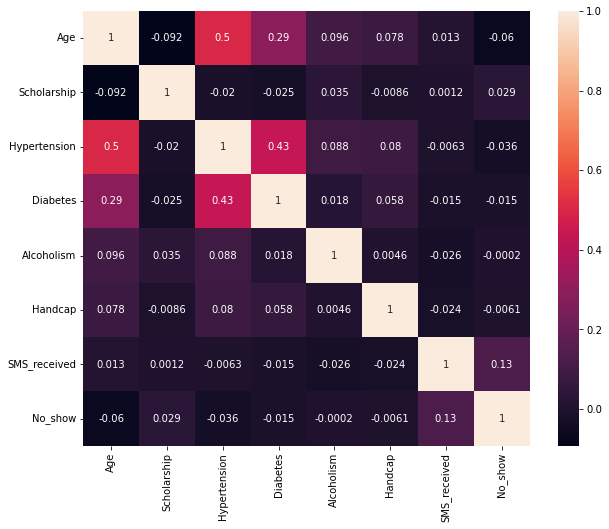

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True);

 This is an illustratration of the coorelation among the features. 
The darker shade show low correlation while the lighter shade show high correlation .
Using the scale numbers and the annoted values on each block can also help in understanding how well each feature correlate.  

### General Overview

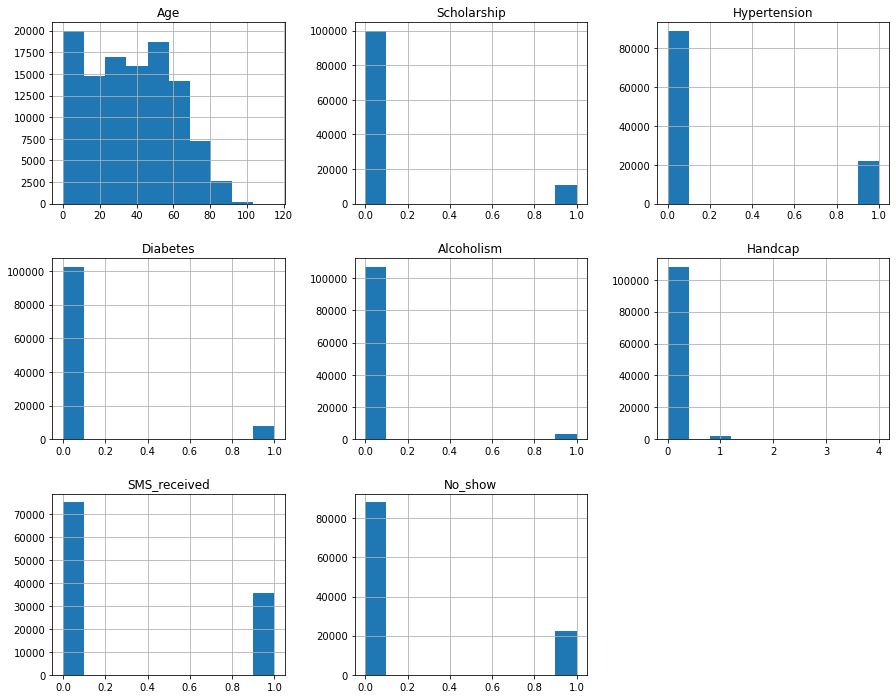

In [23]:
df.hist(figsize=(15,12));

The above illustration shows us the variation in each of the columns .
1:In the column 'Age' ,it shows that the patients were more of people around ages 0-10 followed by people within 40-60.
2:In the "SMS" column , it shows that amongst the patient who didn't recieved SMS were more compared to those that did.
3.In the "No_show" colunmn, it shows that a lot of patient who booked for an appointment didn't come .
4.In the 'Handcap' column, it shows that only a few patients were handcap .
5.In the "Diabetic" column, it shows that only a few patients were daibetic .
6..In the "Diabetic" column, it shows that only a few patients were alcoholic.
7..In the "Hypertension" column, it shows that  lesser patients had it compaired to those who didn't which was by far more. 
8..In the "Scholarship" column, it shows that only a few persons were on sholarship .

### Gender

<AxesSubplot:xlabel='Gender', ylabel='Count'>

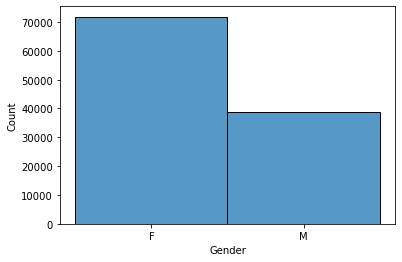

In [48]:
sns.histplot(df["Gender"])

In [49]:
df["Gender"].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In toatal evaluation , they were more females than males in the data set 

(array([0, 1]), [Text(0, 0, 'F'), Text(1, 0, 'M')])

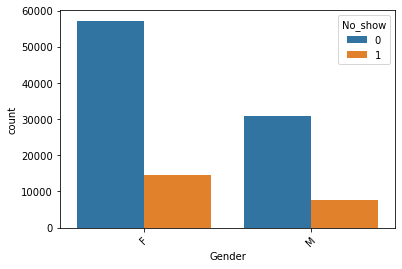

In [119]:
sns.countplot(x= "Gender",hue='No_show',data= df)
plt.xticks(rotation= 45)

Above we can see that most of the ratio of people who showed up between both genders  are almost the same although  females have a higher showing up bar which i think its due to the fact that they were more femaleswho made the appointment.

#### Neighbourhood

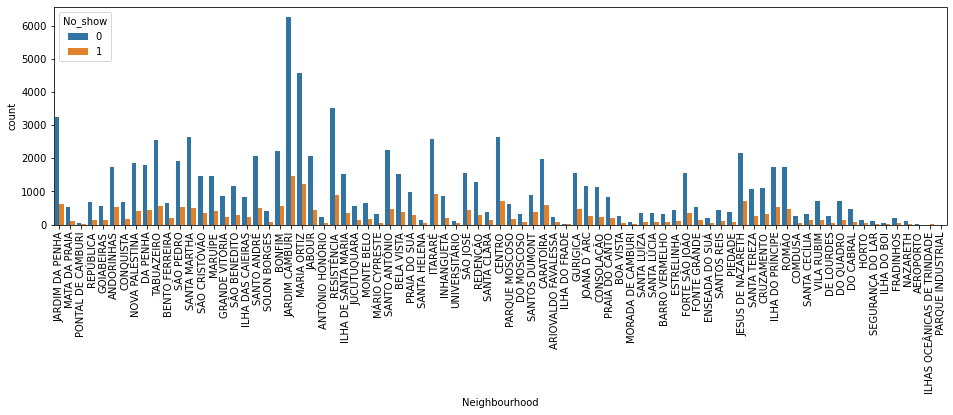

In [110]:
plt.figure(figsize=(16,4))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.Neighbourhood,hue=df.No_show)

In [75]:
df["Neighbourhood"].value_counts()

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: Neighbourhood, Length: 81, dtype: int64

The Neighbourhood with the highest number of show up are places with high number of patients. 

#### Age

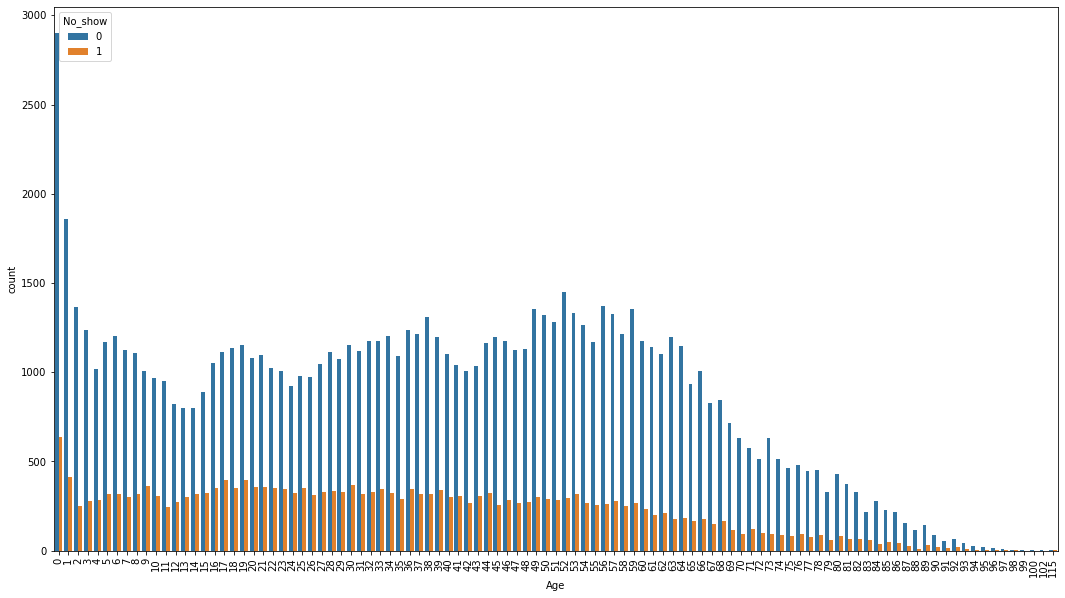

In [116]:
plt.figure(figsize=(18,10))
plt.xticks(rotation=90)
ax=sns.countplot(x=df.Age,hue=df.No_show)

From the above visualisation, it appears that the patients who showed up more are peopl from ages 0-1.

#### Diabetes

<AxesSubplot:xlabel='Diabetes', ylabel='Age'>

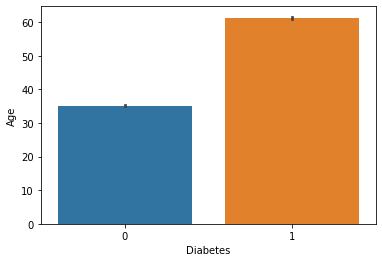

In [136]:
sns.barplot(x='Diabetes',y='Age', data=df)

<AxesSubplot:xlabel='Diabetes', ylabel='count'>

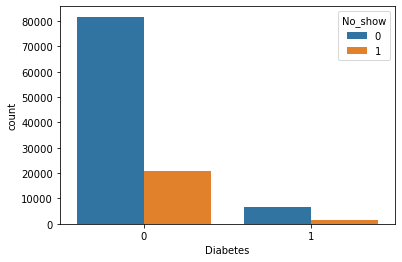

In [120]:
sns.countplot(x='Diabetes',hue="No_show", data=df)

Patients who had didn't have diabetes had a higher  showing up rate   that those who had .

#### scholarship

<AxesSubplot:xlabel='Scholarship', ylabel='Age'>

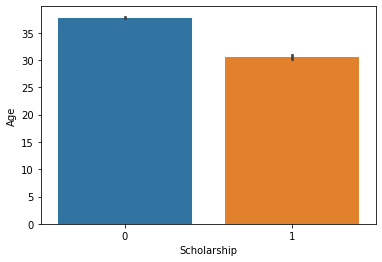

In [135]:
sns.barplot(x='Scholarship',y='Age', data=df)

<AxesSubplot:xlabel='Scholarship', ylabel='count'>

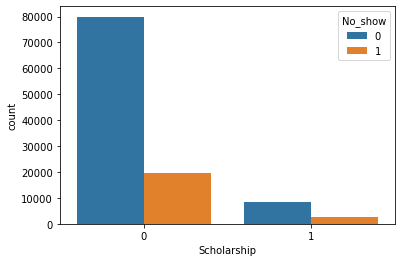

In [125]:
sns.countplot( x='Scholarship',hue='No_show', data=df)

Patients who had scholarship had a less showing up rate to those who didn't

#### Handcap

<AxesSubplot:xlabel='Handcap', ylabel='Age'>

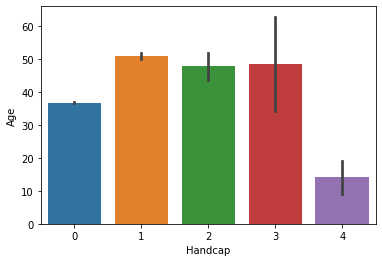

In [134]:
sns.barplot(x='Handcap',y='Age', data=df)

<AxesSubplot:xlabel='Handcap', ylabel='count'>

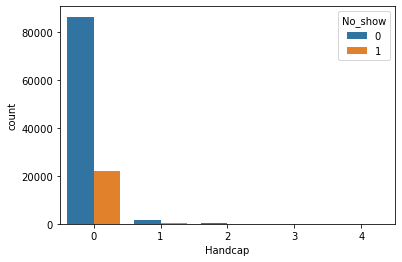

In [124]:
sns.countplot(x='Handcap',hue="No_show", data=df)

In [41]:
df['Handcap'].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

##### Alcoholism

<AxesSubplot:xlabel='Alcoholism', ylabel='Age'>

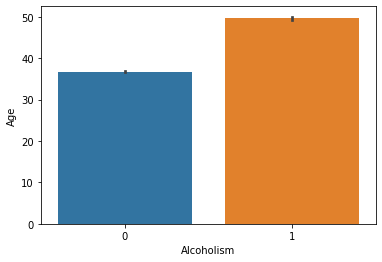

In [133]:
sns.barplot(x='Alcoholism',y='Age', data=df)

Patients who were alcoholics were above 50

<AxesSubplot:xlabel='Alcoholism', ylabel='count'>

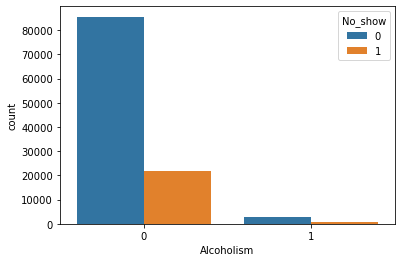

In [126]:
sns.countplot( x='Alcoholism',hue="No_show", data=df)

Patients who aren't alcoholic had a greater show up rate than those that did.

#### Hypertension

<AxesSubplot:xlabel='Hypertension', ylabel='Age'>

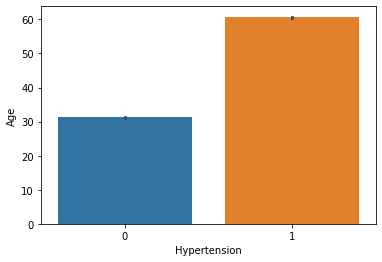

In [132]:
sns.barplot(x='Hypertension',y='Age', data=df)

Most people who had hypertension were above 60

<AxesSubplot:xlabel='Hypertension', ylabel='count'>

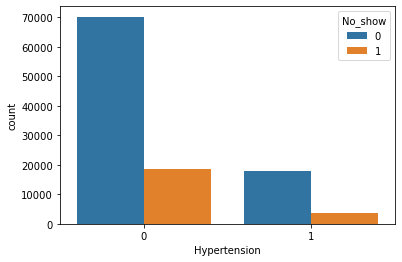

In [127]:
sns.countplot( x='Hypertension',hue="No_show", data=df)

Patients who had high blood pressure had a lesser show uprate to those that didn't

###### SMS

<AxesSubplot:xlabel='SMS_received', ylabel='count'>

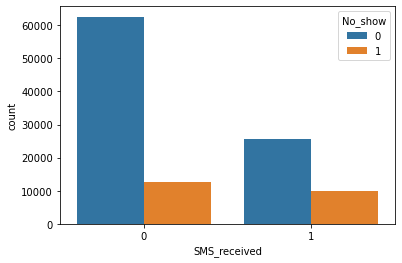

In [129]:
sns.countplot( x='SMS_received',hue="No_show", data=df)

Patient with who recieved SMS had a lesser show up rate to those who didn't receive 

### Conclusion

After a thorough investigation of the dataset , I came to the conclusion that in order to predict the outcome on if a patient is more likely to be present or absent for his / her appointment ,there are four factors responsible as follows:

#### . Age:
     This shows that the younger the patients, the higher the chances that they would show-up due to the fact that most older persons are most likely to suffer from any ailment , which is shown in the heatmap as Age has a high positive correlation with Hypertension and Diabetes.

#### . Health Factors:
    This is a combined factor including features from the dataset ie 'Alcoholism','Diabetese','Handcap'and 'Hypertension'.I noticed that patient who didn't have any health issue showed up . This factor is also showed  that its victims were mostly aldults .

#### . SMS:
     There  isn't much of a difference between those who showed up and those who didn't among the people who recieved a SMS

### .scholarship:
There  isn't much of a difference between those who showed up and those who didn't among the people who were in scholarships .